In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt

<h3> Пункт а)

In [2]:
def norm_pvalue(mean, cov, size, it):
    pvalue_sign = list()
    pvalue_wilx = list()
    
    for i in range(it):
        X, Y = stats.multivariate_normal.rvs(mean, cov, size).T
        U = (Y - X) > 0
        
        pvalue_sign.append(stats.binom_test(sum(U), len(U), p=0.5))
        pvalue_wilx.append(stats.wilcoxon(X, Y)[1])
        
    fig, ax = plt.subplots(figsize=(15, 10))
    
    pvalue_sign.sort()
    pvalue_wilx.sort()
    
    dom = np.linspace(0, 1, 2)
    
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_sign, [i/it for i in range(1, it+1)], label='sign')
    ax.set_title('Sign vs Wilcoxon Test on $N(mean, cov)$')
    ax.plot(pvalue_wilx, [i/it for i in range(1, it+1)], label='wilcoxon')
    ax.legend()
    
    plt.show()

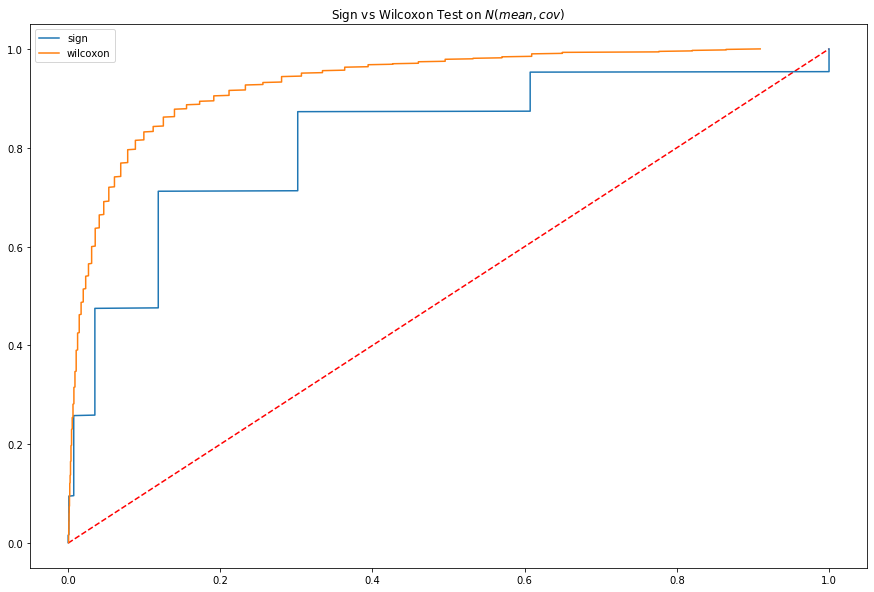

In [3]:
norm_pvalue([1, 2], [[1, 0.5], [0.5, 2]], 15, 1000)

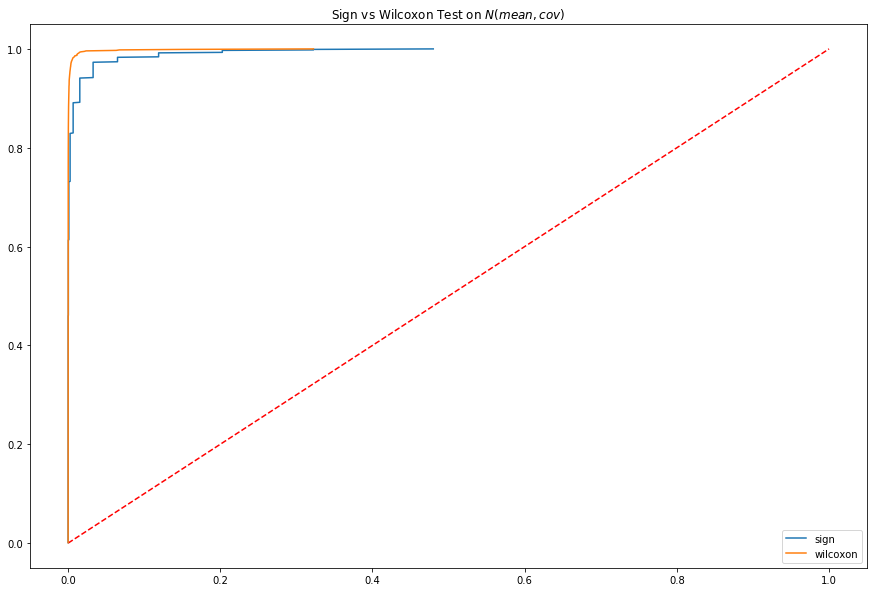

In [4]:
norm_pvalue([1, 2], [[1, 0.5], [0.5, 2]], 50, 1000)

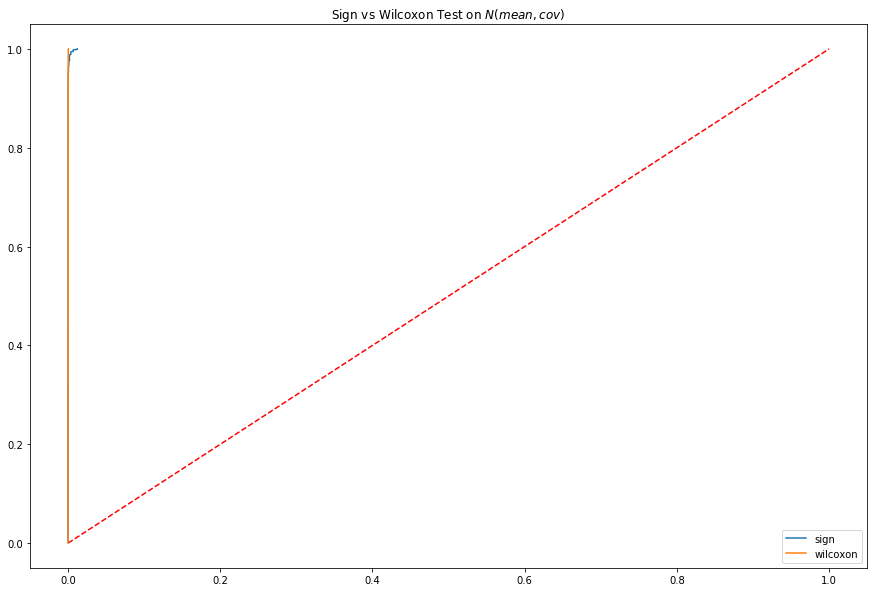

In [5]:
norm_pvalue([1, 2], [[1, 0.5], [0.5, 2]], 100, 1000)

<h3> Пункт б)

In [17]:
def cauchy_pvalue(p, size, it):
    pvalue_sign = list()
    pvalue_wilx = list()
    
    for i in range(it):
        X = stats.cauchy.rvs(0, 1, size)
        U = stats.bernoulli.rvs(p, 0, size)
        Y = X + U
        
        pvalue_sign.append(stats.binom_test(sum(U), len(U), p=0.5))
        pvalue_wilx.append(stats.wilcoxon(X, Y)[1])
        
    fig, ax = plt.subplots(figsize=(15, 10))
    
    pvalue_sign.sort()
    pvalue_wilx.sort()
    
    dom = np.linspace(0, 1, 2)
    
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_sign, [i/it for i in range(1, it+1)], label='sign')
    ax.set_title('Sign vs Wilcoxon Test on $X ~ Cauchy, Y ~ X + Bern(p)$')
    ax.plot(pvalue_wilx, [i/it for i in range(1, it+1)], label='wilcoxon')
    ax.legend()
    
    plt.show()

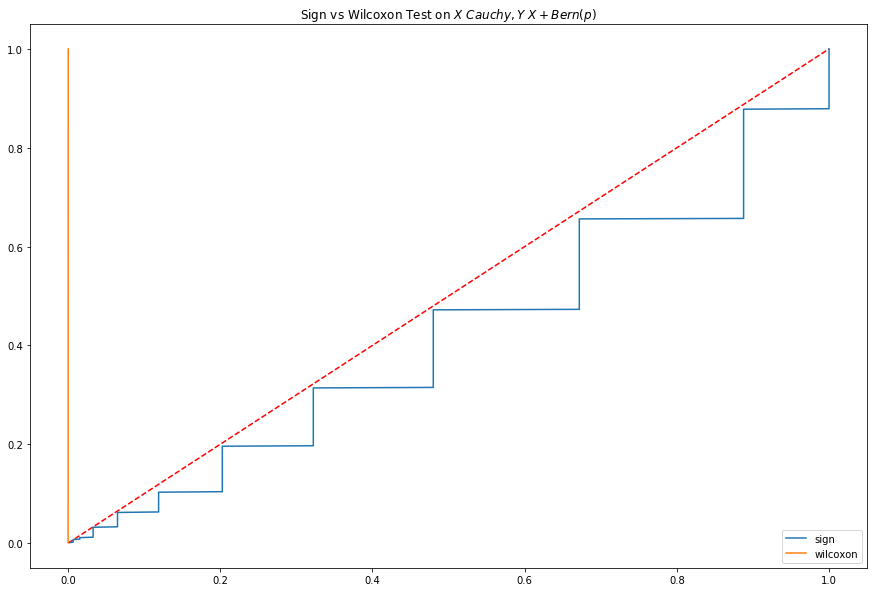

In [18]:
cauchy_pvalue(0.5, 50, 1000)

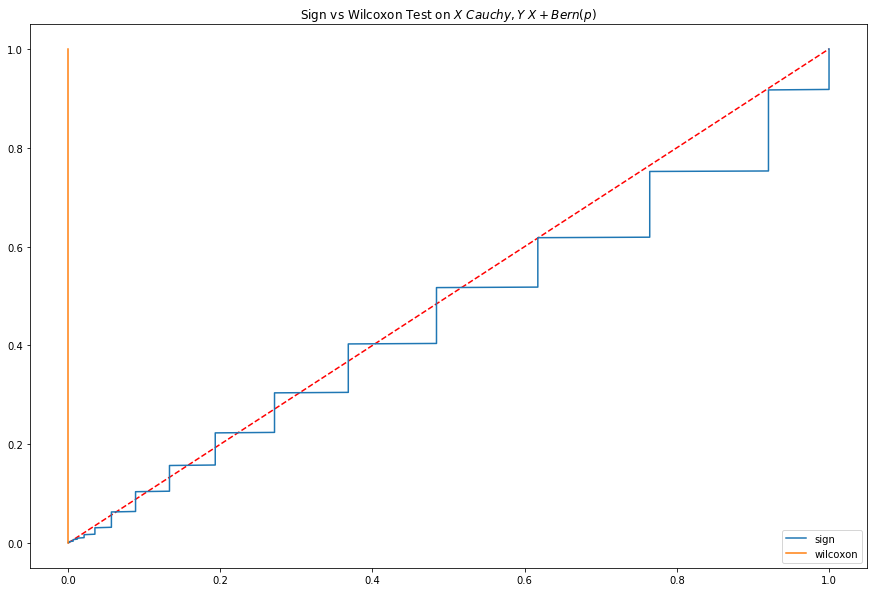

In [19]:
cauchy_pvalue(0.5, 100, 1000)

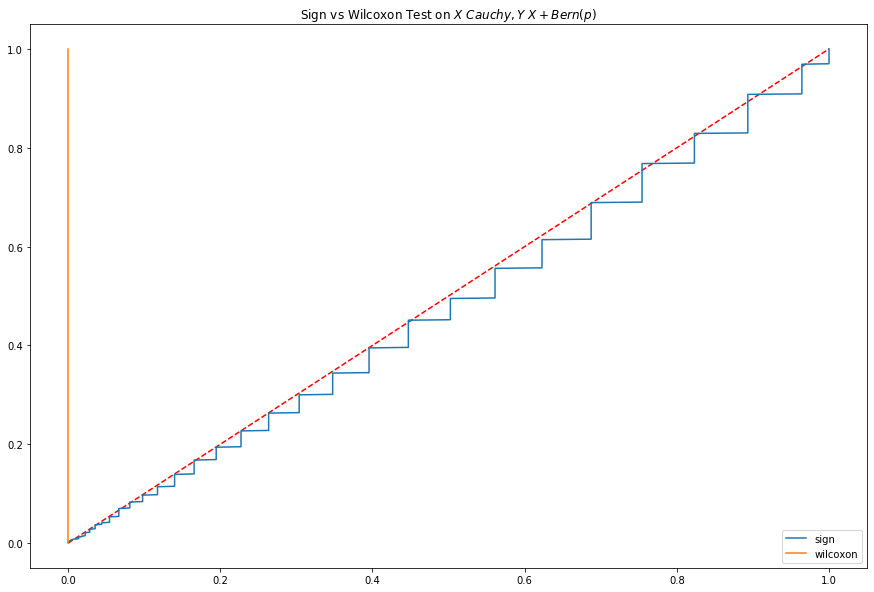

In [20]:
cauchy_pvalue(0.5, 500, 1000)

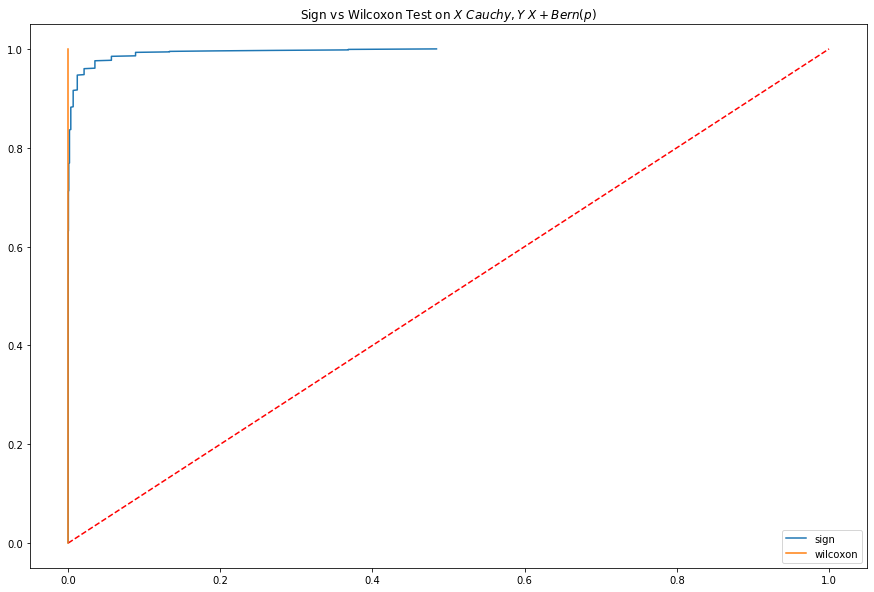

In [21]:
cauchy_pvalue(0.7, 100, 1000)

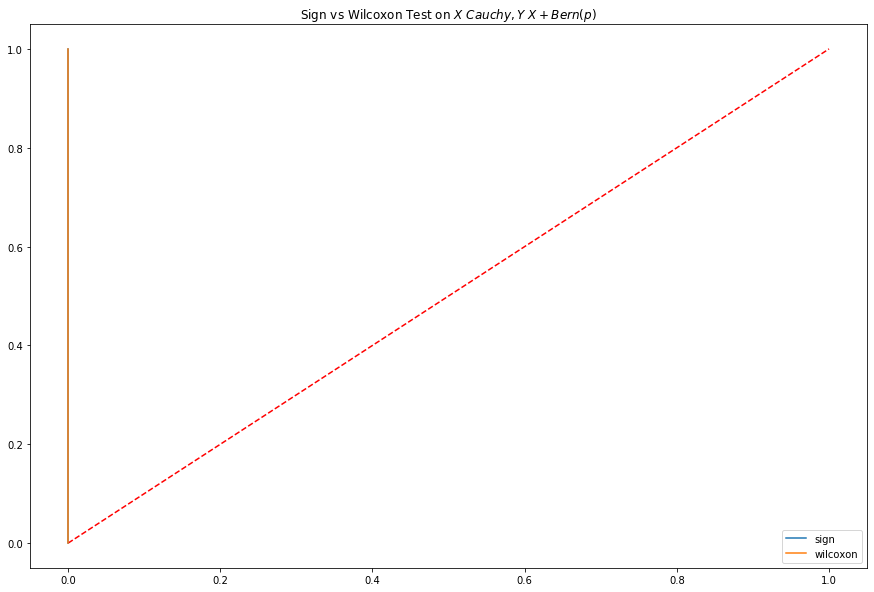

In [24]:
cauchy_pvalue(0.9, 100, 1000)

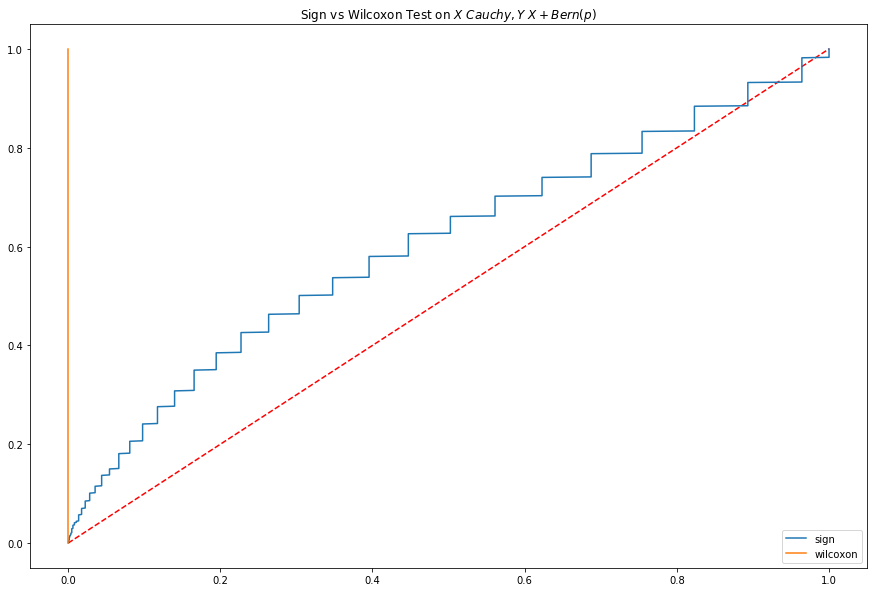

In [29]:
cauchy_pvalue(0.52, 500, 1000)